### Nanocomp - 2025.02 - Prof. Omar
---
<p> 
Optimizing quantum wells for quantum bragg mirror detectors via genetic algorithms(NSGA-II).
</p>

- Marco Túlio Mata
- 
-

---

#### 1. _AUTOMATED RUN_

In [2]:
import include.run_prog as prog

ex1 = [4, 2e-9, 7e-9, 5e-9, 1, 2e-9, 7e-9]
param = ex1
if(len(param) != 7):
    raise ValueError("Parameter list must have exactly 7 elements.")
out_dir = prog.run_qbmd(param[0], param[1], param[2], param[3], param[4], param[5], param[6], create_param_folder=True)
print("Outputs in:", out_dir)

Running command: ['/home/mark/nano.compQBMD/linux_executable/prog', '4', '2.000d0', '7.000d0', '5.000d0', '1', '2.000d0', '7.000d0', '/home/mark/nano.compQBMD/linux_executable/manual_runs/04x2.0_7.0__5.0__01x2.0_7.0/']


KeyboardInterrupt: 

#### 2. _VISUALIZATION_

────────────────────────────────────────────────────────────
Files in /home/mark/nano.compQBMD/linux_executable/fortran_files/05x2.0_7.0__2.0__01x2.0_7.0
────────────────────────────────────────────────────────────
Energy_SL                 : True
FimPrograma               : True
OscStr_SL                 : True
Photocurrent_SL           : True
Transmission_SL           : True
Potencial_SL              : True
Wavefunction_SL           : True

────────────────────────────────────────────────────────────
FimPrograma.txt value
────────────────────────────────────────────────────────────
raw                       : 45.981580999999998
as_float                  : 45.981581

────────────────────────────────────────────────────────────
Energy_SL.txt summary
────────────────────────────────────────────────────────────
num_points                : 45
min (eV?)                 : 284.5690032357867
max (eV?)                 : 696.2440392029428
mean                      : 534.8775760989406
median    

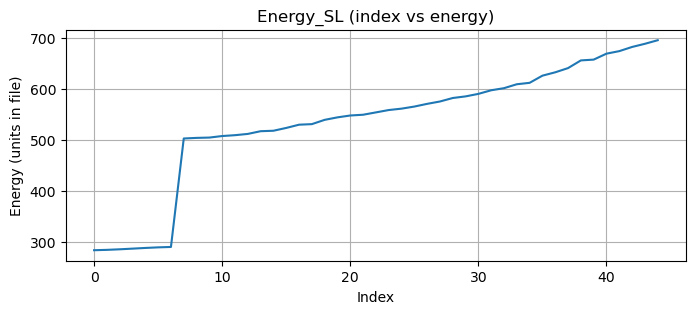

────────────────────────────────────────────────────────────
Photocurrent_SL metrics
────────────────────────────────────────────────────────────
num_peaks                 : 2
peak_energy               : 321.8000200798737
peak_value                : 1.637427097657734e-09
peak_area                 : 9.16040223833341e-09
total_abs_area            : 3.1237610001520265e-08
prominence_ratio          : 0.29324913903104605
Q_factor                  : 51.90322580645155
secondary_peaks_ratio     : 0.10576995843303558
integrated_QE             : 2.1158387617754156e-08



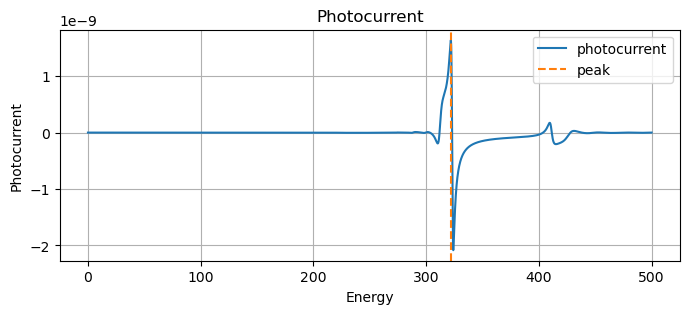

────────────────────────────────────────────────────────────
OscStr_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (44, 2)
x min/max                 : (0.7192575011907427, 411.67503596715613)
y min/max                 : (1.1592213326095649e-06, 0.42456767907002646)



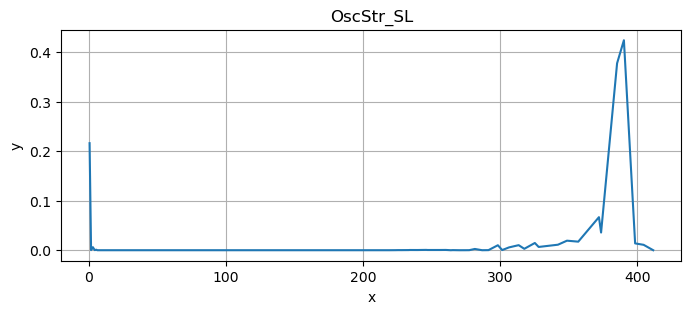

────────────────────────────────────────────────────────────
Transmission_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (4999, 2)
x min/max                 : (0.10000000623986131, 499.90003119306675)
y min/max                 : (3.32013405e-22, 1.0)



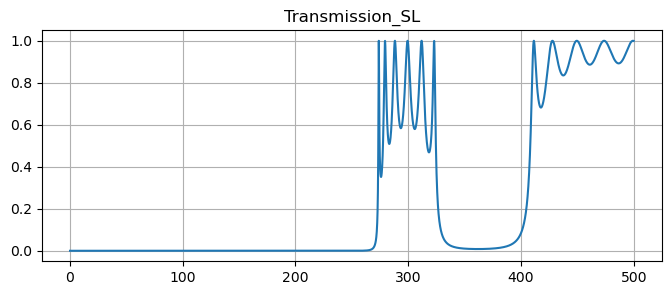

────────────────────────────────────────────────────────────
Potencial_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (1921, 2)
x min/max                 : (-95.0, 97.00000286102295)
y min/max                 : (0.0, 503.0)



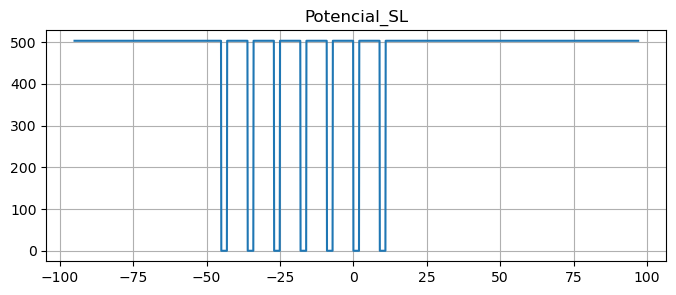

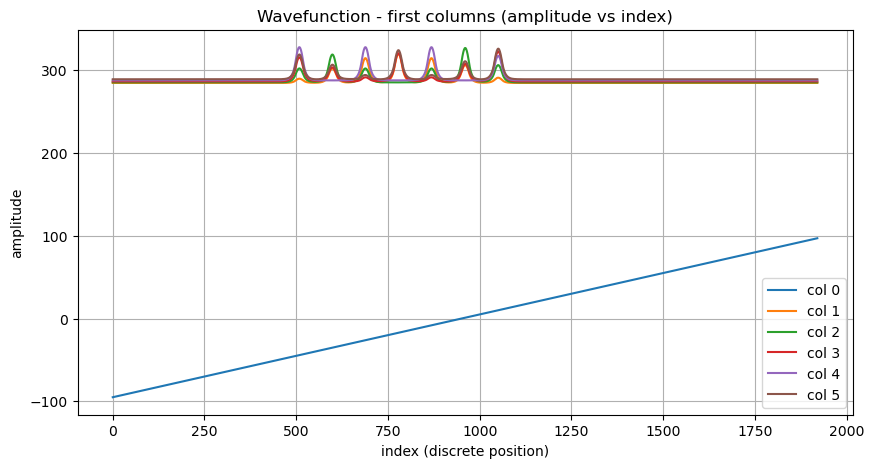

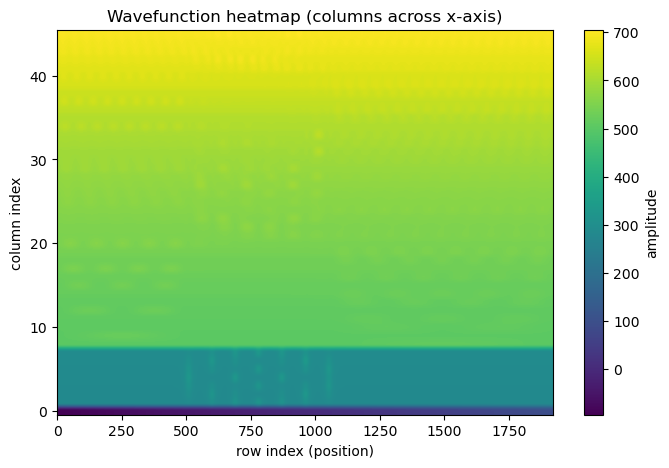

In [ ]:
import include.visualize as viz
out_dir = "/home/mark/nano.compQBMD/linux_executable/manual_runs/05x2.0_7.0__2.0__01x2.0_7.0/"
res = viz.visualize_all(out_dir, show=True)

### 2. _GENETIC ALGORITHM_

In [1]:
import sys
from include.run_opt import run_optimization as run_ga

if __name__ == "__main__":
    try:
        print("Iniciando otimização GA multi-objetivo...")
        results = run_ga()
        print("\n Otimização concluída com sucesso!")
        sys.exit(0)
    except KeyboardInterrupt:
        print("\n  Otimização interrompida pelo usuário")
        sys.exit(1)
    except Exception as e:
        print(f"\n Erro durante a otimização: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)


Iniciando otimização GA multi-objetivo...
OTIMIZAÇÃO NSGA-II - QUANTUM BRAGG MIRROR DETECTOR
População: 20
Gerações: 25
Total de simulações: 500

 Iniciando simulação 0 com parâmetros: ['/home/mark/nano.compQBMD/linux_executable/prog', '4', '4.8d0', '8.7d0', '3.4d0', '2', '1.6d0', '3.4d0', '/home/mark/linux_executable/GA_runs/sim_00000/04x4.8d0_8.7d0_3.4d0_02x1.6d0_3.4d0/']
  Erro ao executar simulação 0: module 'numpy' has no attribute 'trapezoid'

 Iniciando simulação 1 com parâmetros: ['/home/mark/nano.compQBMD/linux_executable/prog', '8', '3.4d0', '8.5d0', '1.1d0', '9', '4.3d0', '4.5d0', '/home/mark/linux_executable/GA_runs/sim_00001/08x3.4d0_8.5d0_1.1d0_09x4.3d0_4.5d0/']
  Erro ao executar simulação 1: module 'numpy' has no attribute 'trapezoid'

 Iniciando simulação 2 com parâmetros: ['/home/mark/nano.compQBMD/linux_executable/prog', '2', '1.7d0', '6.5d0', '3.1d0', '4', '2.2d0', '7.3d0', '/home/mark/linux_executable/GA_runs/sim_00002/02x1.7d0_6.5d0_3.1d0_04x2.2d0_7.3d0/']
  Erro 

AttributeError: 'tuple' object has no attribute 'tb_frame'

### 3. _PARETO_ _FRONT_

In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Find the latest optimization results - use notebook location to find repo root
notebook_dir = Path(os.getcwd())
# Try multiple possible locations for the results directory
possible_dirs = [
    notebook_dir.parent / 'linux_executable' / 'optimization_results'
]

results_dir = None
for d in possible_dirs:
    if d.exists():
        results_dir = d
        break

# List available result files
if results_dir and results_dir.exists():
    csv_files = list(results_dir.glob('pareto_full_*.csv'))
    csv_files.sort(reverse=True)  # Most recent first
    
    if csv_files:
        print(f"Found {len(csv_files)} result file(s)")
        print(f"Using most recent: {csv_files[0].name}")
        latest_file = csv_files[0]
    else:
        print("No pareto_full_*.csv files found. Run the GA optimization first.")
        latest_file = None
else:
    print(f"Results directory not found in any of the expected locations.")
    print("Run the GA optimization first.")
    latest_file = None

Found 1 result file(s)
Using most recent: pareto_full_guilherme.csv


In [7]:
# Load and display Pareto front data
if latest_file:
    df = pd.read_csv(latest_file)
    print(f"\nLoaded {len(df)} Pareto-optimal solutions")
    print("\nColumns:", list(df.columns))
    print("\nFirst 5 solutions:")
    display(df.head())
    
    # Summary statistics
    print("\nObjective Statistics:")
    obj_cols = ['max_energy_eV', 'max_photocurrent', 'quality_factor', 'prominence']
    for col in obj_cols:
        if col in df.columns:
            print(f"  {col}: min={df[col].min():.4f}, max={df[col].max():.4f}, mean={df[col].mean():.4f}")


Loaded 48 Pareto-optimal solutions

Columns: ['RW', 'RQWt', 'RQBt', 'MQWt', 'LW', 'LQWt', 'LQBt', 'max_energy_eV', 'max_photocurrent', 'quality_factor', 'prominence', 'constraint']

First 5 solutions:


,RW,RQWt,RQBt,MQWt,LW,LQWt,LQBt,max_energy_eV,max_photocurrent,quality_factor,prominence,constraint
0,9,2.498410,12.401169,4.117218,8,1.005074,14.907422,3.372314,2.767254e-12,1594.771930,1.000000,-2.526144
1,8,1.331986,13.195380,2.151231,5,3.184903,13.477755,2.617138,3.087518e-08,2354.065955,0.999926,-0.233245
2,9,1.857376,14.164356,1.812588,8,1.212458,13.638487,6.037001,9.949766e+08,0.000000,1.000000,-0.014131
3,9,4.878733,13.755026,2.353180,9,1.624111,14.837555,3.293492,2.892840e+13,0.000000,1.000000,-0.143070
4,9,1.442561,13.219823,2.045213,5,7.218187,14.139735,2.709790,5.023175e-09,2138.432213,0.996589,-0.016652



Objective Statistics:
  max_energy_eV: min=2.6171, max=12.8898, mean=5.5615
  max_photocurrent: min=0.0000, max=28928400000000.0000, mean=607246734634.5696
  quality_factor: min=0.0000, max=2354.0660, mean=1178.7519
  prominence: min=0.9966, max=1.0000, mean=0.9997


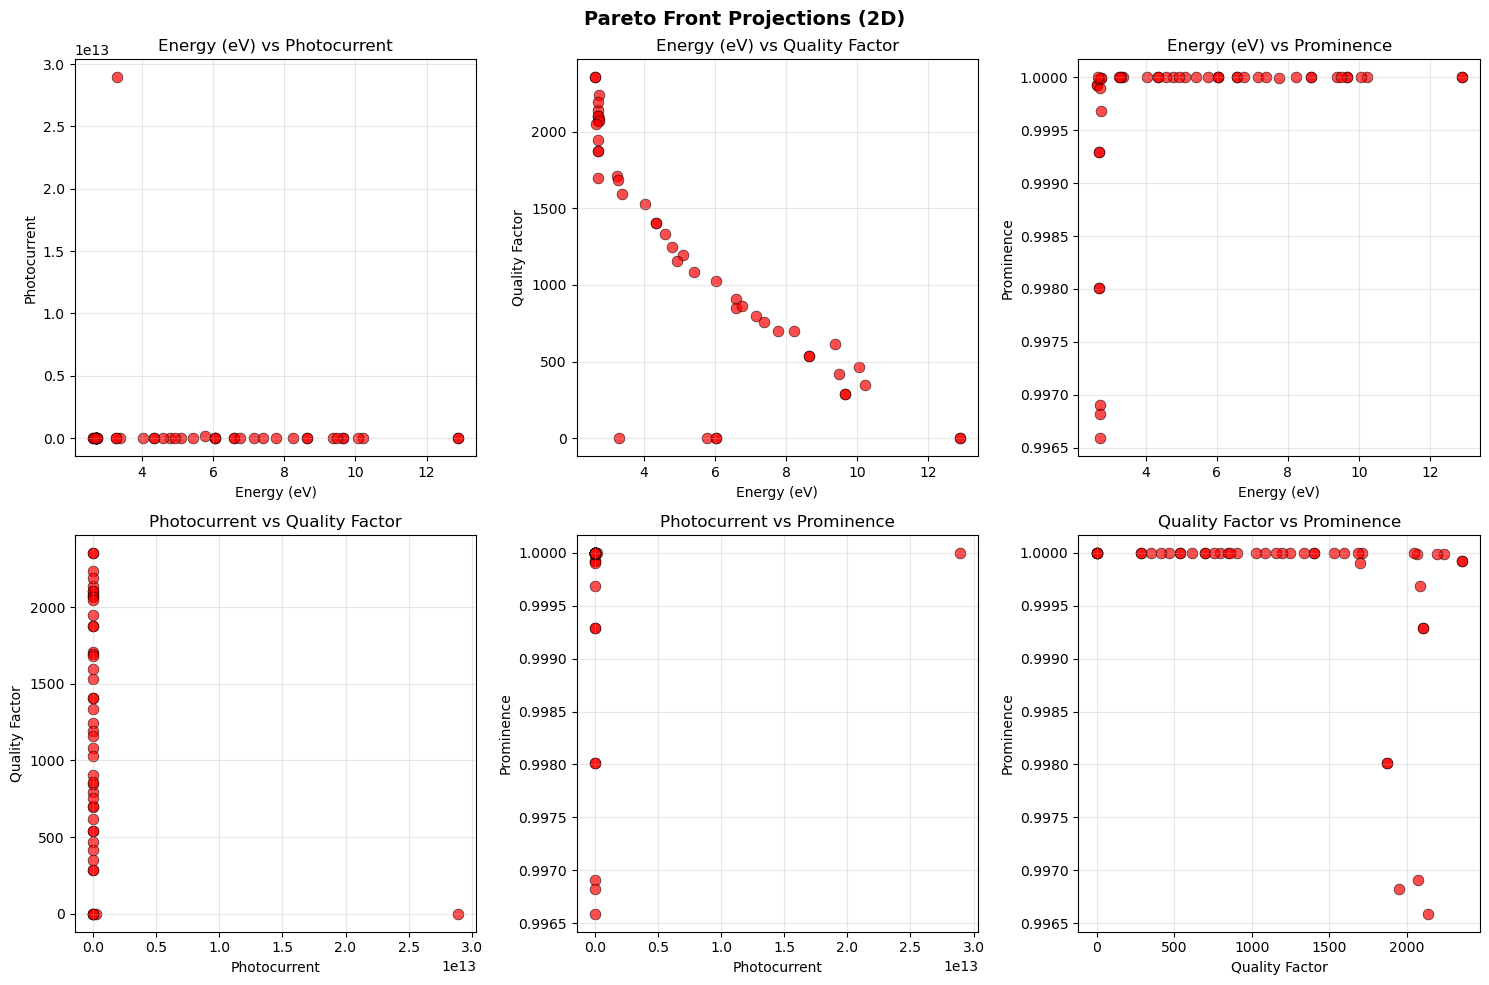

In [8]:
# Visualize Pareto front projections
if latest_file:
    obj_cols = ['max_energy_eV', 'max_photocurrent', 'quality_factor', 'prominence']
    labels = ['Energy (eV)', 'Photocurrent', 'Quality Factor', 'Prominence']
    
    # Create pairwise scatter plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
    
    for idx, (i, j) in enumerate(pairs):
        if obj_cols[i] in df.columns and obj_cols[j] in df.columns:
            axes[idx].scatter(df[obj_cols[i]], df[obj_cols[j]], 
                            c='red', alpha=0.7, s=60, edgecolors='black', linewidth=0.5)
            axes[idx].set_xlabel(labels[i], fontsize=10)
            axes[idx].set_ylabel(labels[j], fontsize=10)
            axes[idx].set_title(f'{labels[i]} vs {labels[j]}')
            axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Pareto Front Projections (2D)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [9]:
# Display best solutions for each objective
if latest_file:
    obj_cols = ['max_energy_eV', 'max_photocurrent', 'quality_factor', 'prominence']
    param_cols = ['ARG1', 'ARG2', 'ARG3', 'ARG4', 'ARG5', 'ARG6', 'ARG7']
    
    print("\n" + "="*70)
    print("BEST SOLUTIONS FOR EACH OBJECTIVE")
    print("="*70)
    
    for col in obj_cols:
        if col in df.columns:
            best_idx = df[col].idxmax()
            best_row = df.loc[best_idx]
            print(f"\n🏆 Best {col}: {best_row[col]:.6f}")
            print(f"   Parameters: ", end="")
            params = [f"{p}={best_row[p]:.2f}" for p in param_cols if p in df.columns]
            print(", ".join(params))


BEST SOLUTIONS FOR EACH OBJECTIVE

🏆 Best max_energy_eV: 12.889812
   Parameters: 

🏆 Best max_photocurrent: 28928400000000.000000
   Parameters: 

🏆 Best quality_factor: 2354.065955
   Parameters: 

🏆 Best prominence: 1.000000
   Parameters: 


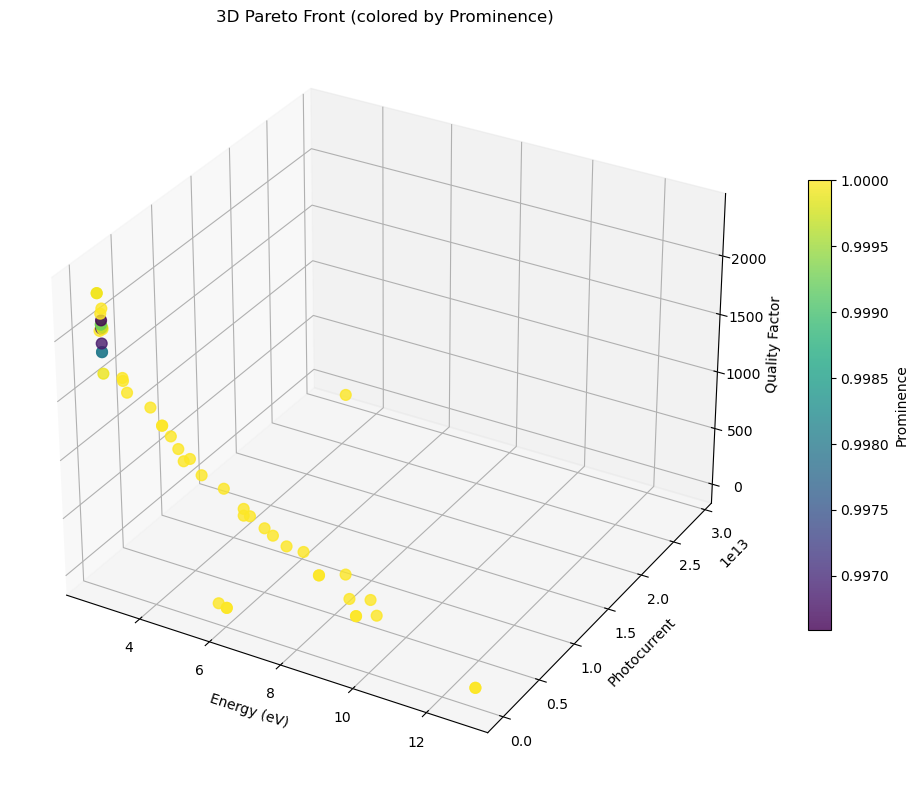

In [10]:
# 3D visualization of Pareto front (first 3 objectives)
if latest_file:
    obj_cols = ['max_energy_eV', 'max_photocurrent', 'quality_factor']
    
    if all(col in df.columns for col in obj_cols):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        scatter = ax.scatter(df[obj_cols[0]], df[obj_cols[1]], df[obj_cols[2]],
                           c=df['prominence'] if 'prominence' in df.columns else 'red',
                           cmap='viridis', s=60, alpha=0.8)
        
        ax.set_xlabel('Energy (eV)')
        ax.set_ylabel('Photocurrent')
        ax.set_zlabel('Quality Factor')
        ax.set_title('3D Pareto Front (colored by Prominence)')
        
        if 'prominence' in df.columns:
            plt.colorbar(scatter, label='Prominence', shrink=0.6)
        
        plt.tight_layout()
        plt.show()